In [67]:
'''All packages'''

import geopandas as gpd
import pandas as pd
from shapely import geometry
from shapely.geometry import Polygon, LineString, Point
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt, mpld3
from mpld3 import fig_to_html, plugins

%matplotlib inline

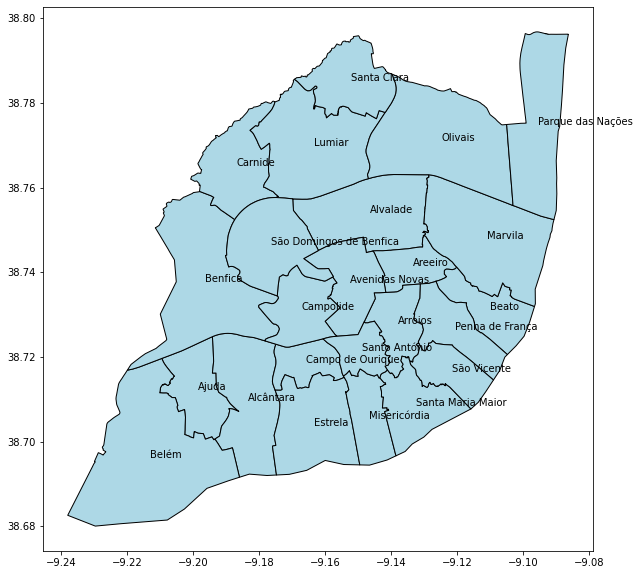

In [68]:
'''Simple Plot of Map Without Filter and Choropleth'''

plt.rcParams['figure.figsize'] = (20, 10) #setting parameters
df_places = gpd.read_file('./Lisboa.geojson') #read file Lisboa.geojson


fig,ax=plt.subplots(1,1)
axis = df_places.plot(ax=ax,color="lightblue", edgecolor='black') #plot of map Lisboa.geojson

#for to put the name of the regions
for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy
    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y)) 

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

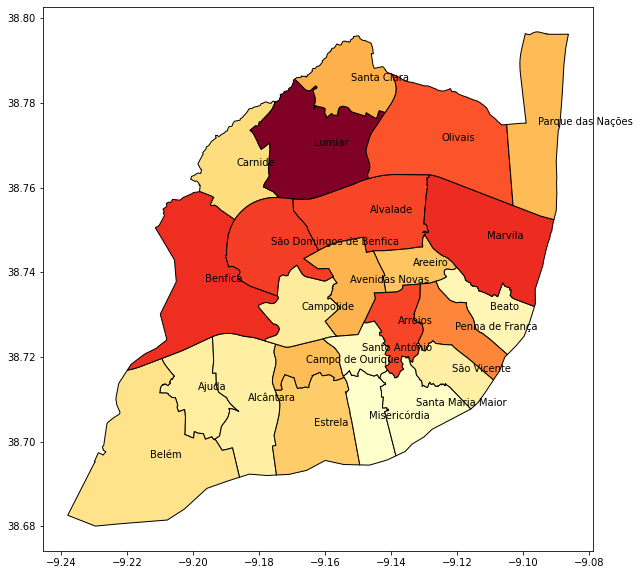

In [69]:
'''Plot of Map with Choropleth of Population'''


population = []

#appending all elements of geojson to convert to integer 
for idx, row in df_places.iterrows():
    population.append(row['Censos 2021 População Lisboa_POPULACAO RESIDENTE'])
    
#converting to integers
for a in range(0, len(population)):
    population[a] = int(population[a])


df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"] = population
    
fig,ax=plt.subplots(1,1)
axis = df_places.plot(ax=ax, column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black",
                      cmap='YlOrRd')


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [92]:
#main variables 

directory = "./archives"
ext = ".geojson"

#variable that contains all the searched filters
lista=[]

listadirs=[]
dic={}
filtrolist=[]
fp={}

In [94]:
#function to search

def leitura(filtro = "normal"):
    i=0
    sum=0
    global lista, listadirs, dic, filtrolist
    listafiles=[]


    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1 and len(file) == len(filtro):
                        print(filtro)
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))
                        

    
    for k, v in dic.items():
        for value in v:
            if value.find(filtro) != -1:
                filtrolist.append(filtro)

def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)
            
leitura()   
pprint()

ambiente:
       .\archives\ambiente\Amb_EcopontosSubterraneos.geojson
       .\archives\ambiente\Amb_Limpeza.geojson
       .\archives\ambiente\Ecopontos.geojson
       .\archives\ambiente\Jardins-Parques-urbanos.geojson
       .\archives\ambiente\Reciclagem.geojson
culturalazer:
       .\archives\culturalazer\Desporto_Instalacoes.geojson
       .\archives\culturalazer\Museus, bibliotecas e arquivos.geojson
economia:
       .\archives\economia\Centros Comerciais.geojson
       .\archives\economia\Feiras.geojson
       .\archives\economia\Mercados.geojson
educacao:
       .\archives\educacao\Escola Secundaria.geojson
       .\archives\educacao\escolas 1 ciclo.geojson
       .\archives\educacao\Escolas 1_Ciclo.geojson
saude:
       .\archives\saude\Farmacias.geojson
       .\archives\saude\Hospitais Publicos.geojson
seguranca:
       .\archives\seguranca\Administracao_Publica.geojson
transportes:
       .\archives\transportes\Estacoes Comboio.geojson
       .\archives\transportes\Estaco

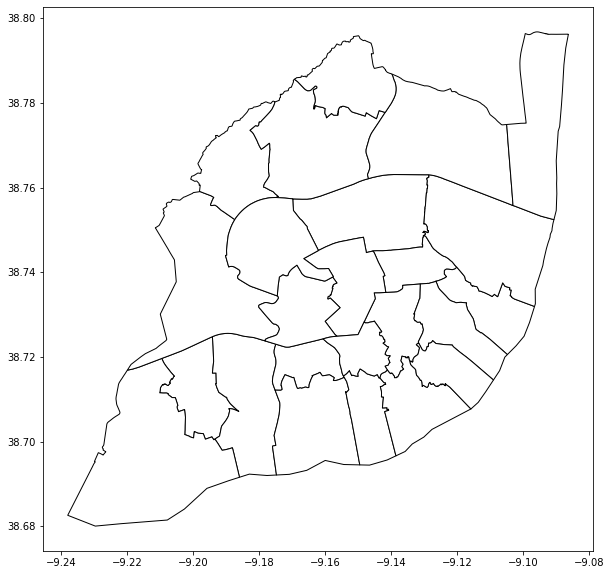

In [95]:
#code with the objective os input severals directory
b=True
c=0


while b:
    
    a = input("Insira os diretorios: ")
    leitura(a)
    if a == "sair":
        b=False




fig, ax=plt.subplots()
for a in lista:
    a.plot(ax=ax, zorder=c)
    c+=1

df_places.plot(ax=ax, color = "white", edgecolor="black")


html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [91]:
#creation of a dictionary with all the importance quantities for each file
amount = []
importance = {}

for a in range(0, len(filtrolist)):
    
    b = float(input("Insira a importancia do filtro "+filtrolist[a]+":"))
    amount.append(b)
    importance[filtrolist[a]]=amount[a]

print(importance)

    

TypeError: can only concatenate str (not "list") to str

In [74]:
print(filtrolist)

['economia', 'economia']


In [30]:
'''Choropleth with Points of Filter'''

geopoints = []
geopointsfiltered = []
geopointsforexplore = {}
count = []
total = []


#organizing the names
df_places.NOME=sorted(df_places.NOME)



for b in range(0, len(lista)):
    #append da geometry de filtro por filtro
    for idx, row in lista[b].iterrows():
        geopoints.append(row.geometry)
        
    for ele in geopoints:
        if ele != None:
            geopointsfiltered.append(ele)
            
    #FOR para analisar a intesecção dos pontos com as regiões 
    for a in geopointsfiltered:
        for idx1, row1 in df_places.iterrows():
                if a.intersects(row1.geometry) == True:
                    count.append(row1.NOME) #append em count da repetição das localidades


    #for para analisar a contagem dos pontos de cada regiao realizando um append a "total"
    for a in df_places.NOME:
        numb = count.count(a)
        total.append(numb) 

    #transformação para int         
    for a in range(0, len(total)):
        total[a] = float(total[a])

    
    fp[filtrolist[b]] = total
    print(type(total[1]))
    
    geopointsforexplore[filtrolist[b]] = geopointsfiltered
    geopoints = []
    geopointsfiltered= []
    count = []
    total = []





<class 'float'>
<class 'float'>


In [84]:
fp[filtrolist[0]][2] = (fp[filtrolist[0]][10] / 10) + importance[filtrolist[0]]

print(fp[filtrolist[0]][2])


0.2


In [31]:
print(geopointsforexplore)

{'culturalazer': [<shapely.geometry.point.Point object at 0x0000016457129C70>, <shapely.geometry.point.Point object at 0x0000016457129C40>, <shapely.geometry.point.Point object at 0x0000016457129610>, <shapely.geometry.point.Point object at 0x00000164571295E0>, <shapely.geometry.point.Point object at 0x0000016457129520>, <shapely.geometry.point.Point object at 0x0000016457129550>, <shapely.geometry.point.Point object at 0x00000164571294F0>, <shapely.geometry.point.Point object at 0x0000016457129D30>, <shapely.geometry.point.Point object at 0x0000016457129D60>, <shapely.geometry.point.Point object at 0x0000016457129D90>, <shapely.geometry.point.Point object at 0x0000016457129DC0>, <shapely.geometry.point.Point object at 0x0000016457129DF0>, <shapely.geometry.point.Point object at 0x0000016457129E20>, <shapely.geometry.point.Point object at 0x0000016457129E50>, <shapely.geometry.point.Point object at 0x0000016457129EB0>, <shapely.geometry.point.Point object at 0x0000016457129EE0>, <shape

AttributeError: 'AxesSubplot' object has no attribute 'add_child'

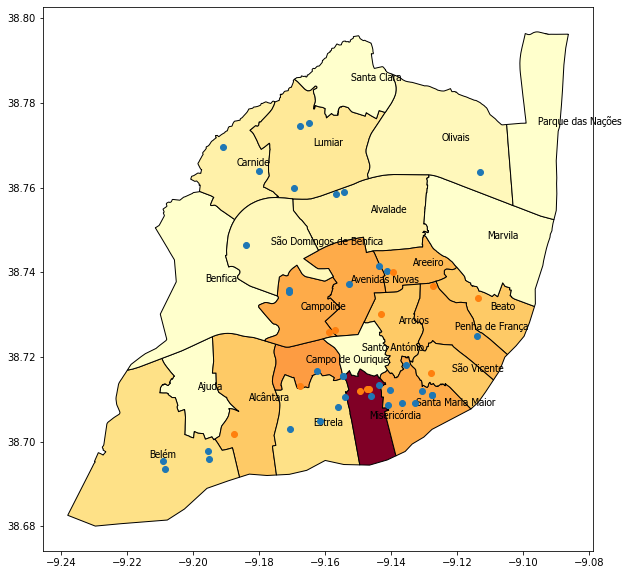

In [14]:
sum=0
#organizing the names of Lisboa 
df_places.NOME=sorted(df_places.NOME)

#soma todos os pontos e dps divide pela quantidade total 
for a in range(0, len(filtrolist)):
    for b in range(0, len(fp[filtrolist[a]])):
        sum+=fp[filtrolist[a]][b]
    for b in range(0, len(fp[filtrolist[a]])): 
        fp[filtrolist[a]][b] = (fp[filtrolist[a]][b] / sum) * importance[filtrolist[a]]

    sum=0 



choropleth=[]
#soma dos pontos das mesmas regioes 
for a in range(0, len(fp[filtrolist[0]])):
    for b in range(0, len(filtrolist)):
        sum += fp[filtrolist[b]][a]
    
    #print(sum)
    choropleth.append(sum)
    sum=0
 

df_places["Censos 2021 População Lisboa_field_4"] = choropleth


fig, ax=plt.subplots()
for a in lista:
    c+=1
    a.plot(ax=ax, zorder=c)

axis = df_places.plot(ax=ax, edgecolor = "black", column = "Censos 2021 População Lisboa_field_4", cmap= "YlOrRd", zorder=1)

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  

#print(filtrolist)
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [50]:
plot = df_places.explore(column = "Censos 2021 População Lisboa_field_4", 
                      cmap='YlOrRd')

aa = lista[0].explore(m=plot)
aa.save("pastel.html")



TypeError: 'NoneType' object is not subscriptable

In [26]:
lista[0].explore()


plot2.save("pastel2.html")



TypeError: 'NoneType' object is not subscriptable

In [40]:
df = pd.DataFrame(geopointsforexplore[filtrolist[0]])

print(type(geopointsforexplore[filtrolist[0]][0]))

<class 'shapely.geometry.point.Point'>


In [46]:
for x in geopointsforexplore[filtrolist[0]]:
    x,y = x.coords.xy
    print(x)
    print(y)

array('d', [-9.18011821036601])
array('d', [38.7637956888131])
array('d', [-9.1138884895196])
array('d', [38.7248698279161])
array('d', [-9.16247180733268])
array('d', [38.7166854068681])
array('d', [-9.14364361125431])
array('d', [38.7414346182461])
array('d', [-9.16933310803176])
array('d', [38.7598303377025])
array('d', [-9.16501659349712])
array('d', [38.7751743743872])
array('d', [-9.16752355879142])
array('d', [38.7746073276653])
array('d', [-9.20843395163949])
array('d', [38.6935994362256])
array('d', [-9.14108378998701])
array('d', [38.7087232592697])
array('d', [-9.15459868831505])
array('d', [38.7154075290545])
array('d', [-9.12762657607663])
array('d', [38.7110573972589])
array('d', [-9.15271660820034])
array('d', [38.7371442920139])
array('d', [-9.15599771375873])
array('d', [38.7081151392089])
array('d', [-9.16152601878075])
array('d', [38.7047570795443])
array('d', [-9.15414604520969])
array('d', [38.7589130759438])
array('d', [-9.19514868335933])
array('d', [38.695808840